In [1]:
import pandas as pd
import numpy as np
import mysql.connector as mariadb
from astropy.time import Time
%matplotlib notebook
import matplotlib.pyplot as plt
from astropy.table import Table
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

pd.set_option('display.max_columns',100)
pd.set_option('float_format', '{:f}'.format)

from matplotlib import rcParams 
rcParams['ytick.labelsize'] = 15
rcParams['xtick.labelsize'] = 15
rcParams['axes.labelsize'] = 20
rcParams['axes.linewidth'] = 2
rcParams['font.size'] = 15
rcParams['axes.titlesize'] = 18


from astropy.table import Table
from astropy.coordinates import SkyCoord
from astropy import units as u
from astropy.table import  hstack
from astropy.table import  vstack
from astropy.table import Column
from astropy.table import join

import pyspark.sql.functions as sparkfunc
from pyspark.sql import SparkSession

spark_session = (SparkSession.builder
         .config('spark.master', "local[20]")
         .config('spark.driver.memory', '20G')
         .enableHiveSupport()
         .getOrCreate())

import axs
axs_catalog = axs.AxsCatalog(spark_session)

In [5]:
axs_catalog.list_table_names()

['sdss_zoned1am_hd',
 'gaia_zoned1am_hd',
 'gaia_dr2_1am_dup',
 'sdss_zoned1am_700lc',
 'gaia_dr2_700lc2',
 'allwise_1am_dup',
 'gaia_sdss_wise_1asec',
 'gaia_sdss_3asec',
 'ztf_1am_old',
 'ztf_exposures',
 'ztf_1am_lc',
 'ztf_1am',
 'ztf_1am_test',
 'sesar_rrlyrae',
 'ztf_fid1_sdss_stars_lt20_2asec',
 'ztf_fid2_sdss_stars_lt20_2asec',
 'ztf_fid3_sdss_stars_lt20_2asec',
 'sdss_dr9_qso_s82',
 'faraway_training_dataset',
 'faraway_labeled_training_dataset',
 'ztf_nobs100',
 'jnk_ztf_test',
 'jnk_ztf_test2',
 'ztf1000',
 'ztf10',
 'ztf_dec18',
 'asassn_variability_catalog',
 'ztf10_assasn',
 'ztf10_assasn_cesium',
 'ztf10_assasn_best',
 'ztf10_assasn_cesium_best',
 'unwise_v1',
 'cklein_flare',
 'unwise_v2',
 'cesium_speedtest_ztfsample',
 'paula_listcvs',
 'dambis_rrlyrae_metalicity',
 'sdss_500b_28e_10800z',
 'gaia_500b_28e_10800z',
 'allwise_500b_28e_10800z',
 'ztf_500b_28e_10800z',
 'ztf_mar19_all',
 'ztf_dr1_s82_qso',
 'green19_stellar_params',
 'catalina_variables_n',
 'caltech_rosa

In [10]:
axs_catalog.table_info('gaia_dr2_1am_dup')

{'table_id': 47,
 'table_name': 'gaia_dr2_1am_dup',
 'num_buckets': 500,
 'zone_height': 0.0166666666,
 'bucket_col': 'zone',
 'ra_col': 'ra',
 'dec_col': 'dec',
 'has_lightcurves': False,
 'lc_columns': None}

In [6]:
gaia = axs_catalog.load("gaia_dr2_1am_dup")

In [22]:
gaia.columns

['solution_id',
 'designation',
 'source_id',
 'random_index',
 'ref_epoch',
 'ra',
 'ra_error',
 'dec',
 'dec_error',
 'parallax',
 'parallax_error',
 'parallax_over_error',
 'pmra',
 'pmra_error',
 'pmdec',
 'pmdec_error',
 'ra_dec_corr',
 'ra_parallax_corr',
 'ra_pmra_corr',
 'ra_pmdec_corr',
 'dec_parallax_corr',
 'dec_pmra_corr',
 'dec_pmdec_corr',
 'parallax_pmra_corr',
 'parallax_pmdec_corr',
 'pmra_pmdec_corr',
 'astrometric_n_obs_al',
 'astrometric_n_obs_ac',
 'astrometric_n_good_obs_al',
 'astrometric_n_bad_obs_al',
 'astrometric_gof_al',
 'astrometric_chi2_al',
 'astrometric_excess_noise',
 'astrometric_excess_noise_sig',
 'astrometric_params_solved',
 'astrometric_primary_flag',
 'astrometric_weight_al',
 'astrometric_pseudo_colour',
 'astrometric_pseudo_colour_error',
 'mean_varpi_factor_al',
 'astrometric_matched_observations',
 'visibility_periods_used',
 'astrometric_sigma5d_max',
 'frame_rotator_object_type',
 'matched_observations',
 'duplicated_source',
 'phot_g_n_ob

In [7]:
%%time
r1 = gaia.region(ra1=0, ra2=0.4, dec1=-0.4, dec2=0.4).select("ra", "dec","phot_g_mean_mag","phot_variable_flag",
                       "designation",  "phot_g_n_obs","dup").toPandas()

r2 = gaia.region(ra1=359.6, ra2=360, dec1=-0.4, dec2=0.4).select("ra", "dec","phot_g_mean_mag","phot_variable_flag",
                       "designation",  "phot_g_n_obs","dup").toPandas()

CPU times: user 74.4 ms, sys: 21.9 ms, total: 96.4 ms
Wall time: 43.1 s


In [8]:
r2['ra_'] = r2['ra']-360

In [32]:
r2['ra_']

0      -0.399329
1      -0.391624
2      -0.386195
3      -0.376580
4      -0.348201
          ...   
1066   -0.082269
1067   -0.043527
1068   -0.033483
1069   -0.000157
1070   -0.000081
Name: ra_, Length: 1071, dtype: float64

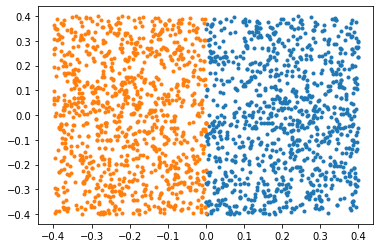

In [9]:
%matplotlib inline 
plt.plot(r1['ra'], r1['dec'], '.')
plt.plot(r2['ra_'], r2['dec'], '.')

In [15]:
r2[:4]

,ra,dec,phot_g_mean_mag,phot_variable_flag,designation,phot_g_n_obs,dup,ra_
0,359.600671,0.305844,18.926210,NOT_AVAILABLE,Gaia DR2 2642182379200351872,329,0,-0.399329
1,359.608376,0.302637,16.892691,NOT_AVAILABLE,Gaia DR2 2642182383496166912,318,0,-0.391624
2,359.613805,0.308957,15.370433,NOT_AVAILABLE,Gaia DR2 2642182383496166784,327,0,-0.386195
3,359.623420,0.313871,20.188049,NOT_AVAILABLE,Gaia DR2 2642182211697474816,218,0,-0.376580


In [10]:


r1t = Table.from_pandas(r1)
r2t = Table.from_pandas(r2)


In [11]:
results = vstack([r1t, r2t], join_type='inner') # so we loose ra_ column ... 
results['starId'] = np.arange(len(results))
results.write('GaiaDR2_0.64_deg_sq.txt', format='ascii')

In [3]:
results = Table.read('GaiaDR2_0.64_deg_sq.txt', format='ascii')

In [4]:
from matplotlib import rcParams 
rcParams['ytick.labelsize'] = 15
rcParams['xtick.labelsize'] = 15
rcParams['axes.labelsize'] = 20
rcParams['axes.linewidth'] = 2
rcParams['font.size'] = 15
rcParams['axes.titlesize'] = 18

fig,ax = plt.subplots(1,2,figsize=(14,6))
fig.suptitle('N=%d GAIA DR2 sources'%len(results))
ax[0].hist(results['phot_g_mean_mag'], histtype='step',lw=2, bins=20)
ax[0].set_xlabel('phot_g_mean_mag')
ax[0].set_ylabel('count')
# I plot here separately r1 and r2 because otherwise 
#inner stacking takes away the ra_  shifted column that 
# is present only in the left part of the query ... 
ax[1].scatter(r1['ra'], r1['dec'],s=r1['phot_g_mean_mag'], c='b', alpha=0.6)
ax[1].scatter(r2['ra_'], r2['dec'], s=r2['phot_g_mean_mag'],c='b',alpha=0.6)

# plot sources that are brighter than 10 - should they be excluded ? 
cutMag = 11
m = r1['phot_g_mean_mag'] < cutMag
ax[1].scatter(r1['ra'][m], r1['dec'][m],s=50, c='orange', alpha=0.6)

m = r2['phot_g_mean_mag'] < cutMag
ax[1].scatter(r2['ra_'][m], r2['dec'][m],s=50, c='orange', alpha=0.6)



ax[1].set_xlabel('ra')
ax[1].set_ylabel('dec')
plt.savefig('GAIA_DR2_ComCam_FOV.png', bbox_inches='tight', dpi=100)

<IPython.core.display.Javascript object>

NameError: name 'r1' is not defined

There are built-in limits in https://github.com/lsst-ts/ts_wep/blob/master/python/lsst/ts/wep/bsc/Filter.py  . Te-Wei said "The values initially comes from the SPT-343.We could put those values into a configuration file instead of hard-coded in a latter time." , and he acknowleged that sources outside of these ranges are discarded to decrease the memory use  - apparently according to the 2016-2017 UW study, "for each CCD, we could have >1500 - 2000 stars. The number of sources in this spec will be only < 100 stars."
    
     # Magnitude boundary for each filter type
    U_LOW_MAG = 7.94
    U_HIGH_MAG = 14.80

    G_LOW_MAG = 9.74
    G_HIGH_MAG = 16.17

    R_LOW_MAG = 9.56
    R_HIGH_MAG = 15.73

    I_LOW_MAG = 9.22
    I_HIGH_MAG = 15.26

    Z_LOW_MAG = 8.83
    Z_HIGH_MAG = 14.68

    Y_LOW_MAG = 8.02
    Y_HIGH_MAG = 13.76
    
    

Since we want to see how the realistic field would look like, I'm not going to make any cuts: save in the format 

    # Id	 Ra		 Decl		 Mag
    0	 359.704865	 -0.249369	 16.000000
    1	 359.708385	 -0.249369	 16.000000
    2	 359.704865	 -0.014669	 16.000000
    3	 359.708385	 -0.014669	 16.000000
    4	 359.704865	 0.220031	 16.000000

Use exactly the same writing routine as ts_phosim `exportSkyToFile` : https://github.com/lsst-ts/ts_phosim/blob/master/python/lsst/ts/phosim/SkySim.py 
    
    

In [5]:
# Add the header (star ID, ra, decl, magnitude)

cutMag = 11 
selection = results[results['phot_g_mean_mag'] > cutMag]
selection['starId'] = np.arange(len(selection))

# Add the star information
content = "# Id\t Ra\t\t Decl\t\t Mag\n" # initialize the first output line ... 
for i in range(len(selection['starId'])):
    content += "%d\t %3.6f\t %3.6f\t %3.6f\n" % (
        selection['starId'][i], selection['ra'][i], selection['dec'][i], selection['phot_g_mean_mag'][i])
path = '/epyc/users/suberlak/Commissioning/aos/ts_phosim/notebooks/analysis_scripts/results_gaia/'
fname = 'starCatGAIA_gt'+str(cutMag)+'.txt'
outputFilePath = path+fname

# Write into file
fid = open(outputFilePath, "w")
fid.write(content)
fid.close()

In [6]:
content = "# abbrevDetectorName\t focalPlane\t starId\t xpos\t ypos\t"
        
content += "%s\t  %s\t %d\t %4.6f\t %4.6f\t "%(abbrevDectectorName(sensorName), 'intra', 
                                                    intraDonut.getStarId(),
                                                    intraDonut.getPixelPos()[0],
                                                    intraDonut.getPixelPos()[1]
                                                   )

content += "%s\t  %s\t %d\t %4.6f\t %4.6f\t "%(abbrevDectectorName(sensorName), 'extra', 
                                                    extraDonut.getStarId(),
                                                    extraDonut.getPixelPos()[0],
                                                    extraDonut.getPixelPos()[1]
                                                   )

path = postageImgDir
fname = 'donutStarsExtraIntra.txt'
outputFilePath = path + fname

# Write into file
fid = open(outputFilePath, "w")
fid.write(content)
fid.close()


2099

In [ ]:
topDir = 'results_edge'
skyFilePath = os.path.join(topDir,'starCatEdge.txt')
os.path.exists(skyFilePath)

len(selection)

In [ ]:
data_dir = '/epyc/users/suberlak/Commissioning/aos/ts_phosim/notebooks/analysis_scripts/results_gaia/noMagCut/'
print('Reading data from \n')
print(data_dir)
repo_dir = os.path.join(data_dir, 'input/rerun/run1')
butler = dafPersist.Butler(repo_dir)

In [3]:
import os
data_dir = '/epyc/users/suberlak/Commissioning/aos/ts_phosim/notebooks/analysis_scripts/results_gaia/noMagCut/'
outputImgDir = data_dir + 'iter0/img/'
tmpDirPath = outputImgDir + 'tmp'
intraFocalDirName =  'intra'
extraFocalDirName =  'extra'


for imgType in (intraFocalDirName, extraFocalDirName):
            # Repackage the images to the temporary directory
            command = "phosim_repackager.py"
            phosimImgDir = os.path.join(outputImgDir, imgType)
            argstring = "%s --out_dir=%s" % (phosimImgDir, tmpDirPath)
            #runProgram(command, argstring=argstring)



## Select GAIA data on entire LSST focal plane with boresight (0,0), that includes stars on all four WFS sensors

In [9]:
 where((ztf_lc['nobs_avail']>1)

One sensor (R22), from -0.4 to 0.4 contained approx 2100 GAIA DR2  stars (no mag cut).  So region 25 times the size (including entire LSST FOV) would include approx 50k stars. Let's try...  We need to query separately for +ve and -ve ra, and then merge at teh end. 

In [7]:
gaia = axs_catalog.load("gaia_dr2_1am_dup")

In [8]:
a = 0.352  # width of half of one sensor (eg. ComCam) in degrees : sensor stretches from -a to a 

# for ComCam, the query was : 
# r1 = gaia.region(ra1=0, ra2=a, dec1=-a, dec2=a).select("ra", "dec","phot_g_mean_mag","phot_variable_flag",
#                        "designation",  "phot_g_n_obs","dup").toPandas()

# r2 = gaia.region(ra1=360-a, ra2=360, dec1=-a, dec2=a).select("ra", "dec","phot_g_mean_mag","phot_variable_flag",
#                        "designation",  "phot_g_n_obs","dup").toPandas()

# for entire LSST FOV : 
# it spans from -5a to 5a 
%%time

r1 = gaia.region(ra1=0, ra2=5*a, dec1=-5*a, dec2=5*a).select("ra", "dec","phot_g_mean_mag","phot_variable_flag",
                       "designation",  "phot_g_n_obs","dup").toPandas()

r2 = gaia.region(ra1=360-5*a, ra2=360, dec1=-5*a, dec2=5*a).select("ra", "dec","phot_g_mean_mag","phot_variable_flag",
                       "designation",  "phot_g_n_obs","dup").toPandas()


In [9]:
# Convert ra from 0 to 360  to   -180, 180,  by subtracting 360 from the left hand side portion
# just for plotting ... 
r2['ra_'] = r2['ra']-360

In [17]:
# How many stars we've got ? 
len(r1)+len(r2)

40726

Text(0, 0.5, 'dec')

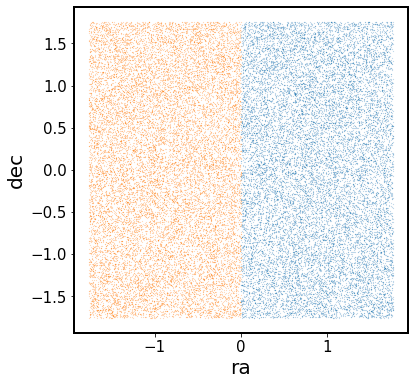

In [16]:
# illustrate the stars that we got : 
%matplotlib inline 

fig,ax =plt.subplots(1,1,figsize=(6,6))
ax.scatter(r1['ra'], r1['dec'], s = 0.01)
ax.scatter(r2['ra_'], r2['dec'],s=0.01)
ax.set_xlabel('ra')
ax.set_ylabel('dec')

In [18]:
# Convert from pandas to astropy, and merge both tables 
r1t = Table.from_pandas(r1)
r2t = Table.from_pandas(r2)


# during the merger we loose ra_ column ,
# which is fine, because PhoSim takes ra in 0,360 format 
results = vstack([r1t, r2t], join_type='inner')
results['starId'] = np.arange(len(results))

# Save as ascii file for future reference ... 
fname  = 'GaiaDR2_LSST_FOV_40k_stars.txt'
results.write(fname, format='ascii')

# Read the file 
#results = Table.read(fname, format='ascii')

In [ ]:
# Store as PhoSim catalog ...

# Add the header (star ID, ra, decl, magnitude)

cutMag = 11 
selection = results[results['phot_g_mean_mag'] > cutMag]
selection['starId'] = np.arange(len(selection))

# Add the star information
content = "# Id\t Ra\t\t Decl\t\t Mag\n" # initialize the first output line ... 
for i in range(len(selection['starId'])):
    content += "%d\t %3.6f\t %3.6f\t %3.6f\n" % (
        selection['starId'][i], selection['ra'][i], selection['dec'][i], selection['phot_g_mean_mag'][i])
path = '/epyc/users/suberlak/Commissioning/aos/ts_phosim/notebooks/analysis_scripts/results_gaia/'
fname = 'starCatGAIA_gt'+str(cutMag)+'.txt'
outputFilePath = path+fname

# Write into file
fid = open(outputFilePath, "w")
fid.write(content)
fid.close()

